In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"D:\ML_ineuron_course\dataset\winequality-red.csv")
dataset.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

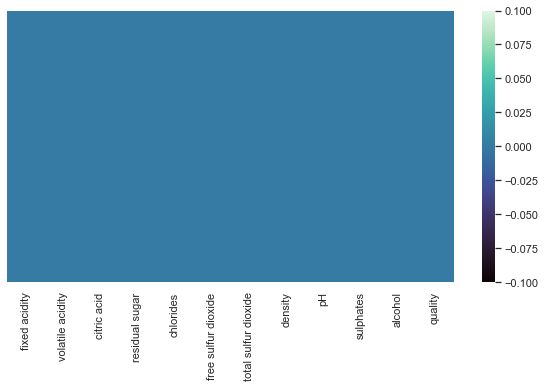

In [118]:
plt.figure(figsize=(10,5))
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=True,cmap='mako')

In [4]:
dataset.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
dataset.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

In [ ]:
sns.set_theme(style='darkgrid', palette='deep')
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dataset.columns:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x = dataset[column], kde=True, color='blue')
        plt.xlabel(column, fontsize=20)
        plt.ylabel("Count", fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [7]:
zeros_feature = dataset.columns
for col in zeros_feature:
    print(f" Zero in {col} : {(dataset[col]==0).sum()}")

 Zero in fixed acidity : 0
 Zero in volatile acidity : 0
 Zero in citric acid : 132
 Zero in residual sugar : 0
 Zero in chlorides : 0
 Zero in free sulfur dioxide : 0
 Zero in total sulfur dioxide : 0
 Zero in density : 0
 Zero in pH : 0
 Zero in sulphates : 0
 Zero in alcohol : 0
 Zero in quality : 0


In [8]:
dataset.corr(method='spearman')

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.278282     0.661708   
volatile acidity          -0.278282          1.000000    -0.610259   
citric acid                0.661708         -0.610259     1.000000   
residual sugar             0.220701          0.032386     0.176417   
chlorides                  0.250904          0.158770     0.112577   
free sulfur dioxide       -0.175137          0.021163    -0.076452   
total sulfur dioxide      -0.088417          0.094110     0.009400   
density                    0.623071          0.025014     0.352285   
pH                        -0.706674          0.233572    -0.548026   
sulphates                  0.212654         -0.325584     0.331074   
alcohol                   -0.066576         -0.224932     0.096456   
quality                    0.114084         -0.380647     0.213481   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.220701   0.250904            -0.175137   
volatile acidity            0.032386   0.158770             0.021163   
citric acid                 0.176417   0.112577            -0.076452   
residual sugar              1.000000   0.212959             0.074618   
chlorides                   0.212959   1.000000             0.000805   
free sulfur dioxide         0.074618   0.000805             1.000000   
total sulfur dioxide        0.145375   0.130033             0.789698   
density                     0.422266   0.411390            -0.041178   
pH                         -0.089971  -0.234361             0.115679   
sulphates                   0.038332   0.020825             0.045862   
alcohol                     0.116548  -0.284504            -0.081367   
quality                     0.032048  -0.189922            -0.056901   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.088417  0.623071 -0.706674   0.212654   
volatile acidity                  0.094110  0.025014  0.233572  -0.325584   
citric acid                       0.009400  0.352285 -0.548026   0.331074   
residual sugar                    0.145375  0.422266 -0.089971   0.038332   
chlorides                         0.130033  0.411390 -0.234361   0.020825   
free sulfur dioxide               0.789698 -0.041178  0.115679   0.045862   
total sulfur dioxide              1.000000  0.129332 -0.009841  -0.000504   
density                           0.129332  1.000000 -0.312055   0.161478   
pH                               -0.009841 -0.312055  1.000000  -0.080306   
sulphates                        -0.000504  0.161478 -0.080306   1.000000   
alcohol                          -0.257806 -0.462445  0.179932   0.207330   
quality                          -0.196735 -0.177074 -0.043672   0.377060   

                       alcohol   quality  
fixed acidity        -0.066576  0.114084  
volatile acidity     -0.224932 -0.380647  
citric acid           0.096456  0.213481  
residual sugar        0.116548  0.032048  
chlorides            -0.284504 -0.189922  
free sulfur dioxide  -0.081367 -0.056901  
total sulfur dioxide -0.257806 -0.196735  
density              -0.462445 -0.177074  
pH                    0.179932 -0.043672  
sulphates             0.207330  0.377060  
alcohol               1.000000  0.478532  
quality               0.478532  1.000000

In [ ]:
plt.figure(figsize=(30,10))

heatmap = sns.heatmap(dataset.corr(method='spearman'), vmin=-1,vmax=1, annot=True, cmap='viridis')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':3}, pad=12)
plt.show()

In [ ]:
sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=2)
graph = sns.pairplot(dataset, kind='scatter', diag_kind='kde', hue='quality')
graph.fig.set_size_inches(35,35)

In [ ]:
dataset['quality'].unique()

In [ ]:
sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1.5)
plt.figure(figsize=(10,8), facecolor='white')
sns.barplot(x=dataset['quality'].unique(),y=dataset['quality'].value_counts(),orient="v")
plt.xlabel("Quality Rankings")
plt.ylabel("Number of Red Wine")
plt.title("Distribution of Red Wine Quality Ratings")
plt.show()

In [ ]:
dataset.columns

In [ ]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1
for feature in dataset.columns:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxenplot(x = dataset[feature],color='green')
    plotnumber+=1
plt.tight_layout()

In [9]:
def identify_outliers(data_column):
    df = pd.DataFrame(data_column)
    quar1 = df.quantile(0.25)
    quar3 = df.quantile(0.75)
    IQR = quar3 - quar1
    return((df < (quar1-1.5*IQR)) | (df > (quar3+1.5*IQR))).sum()

data_columns = dataset.columns
print("\n Number of the outliers in each attributes \n")
for (colName, colData) in dataset.iteritems():
    print(identify_outliers(dataset[colName]))


 Number of the outliers in each attributes 

fixed acidity    49
dtype: int64
volatile acidity    19
dtype: int64
citric acid    1
dtype: int64
residual sugar    155
dtype: int64
chlorides    112
dtype: int64
free sulfur dioxide    30
dtype: int64
total sulfur dioxide    55
dtype: int64
density    45
dtype: int64
pH    35
dtype: int64
sulphates    59
dtype: int64
alcohol    13
dtype: int64
quality    28
dtype: int64


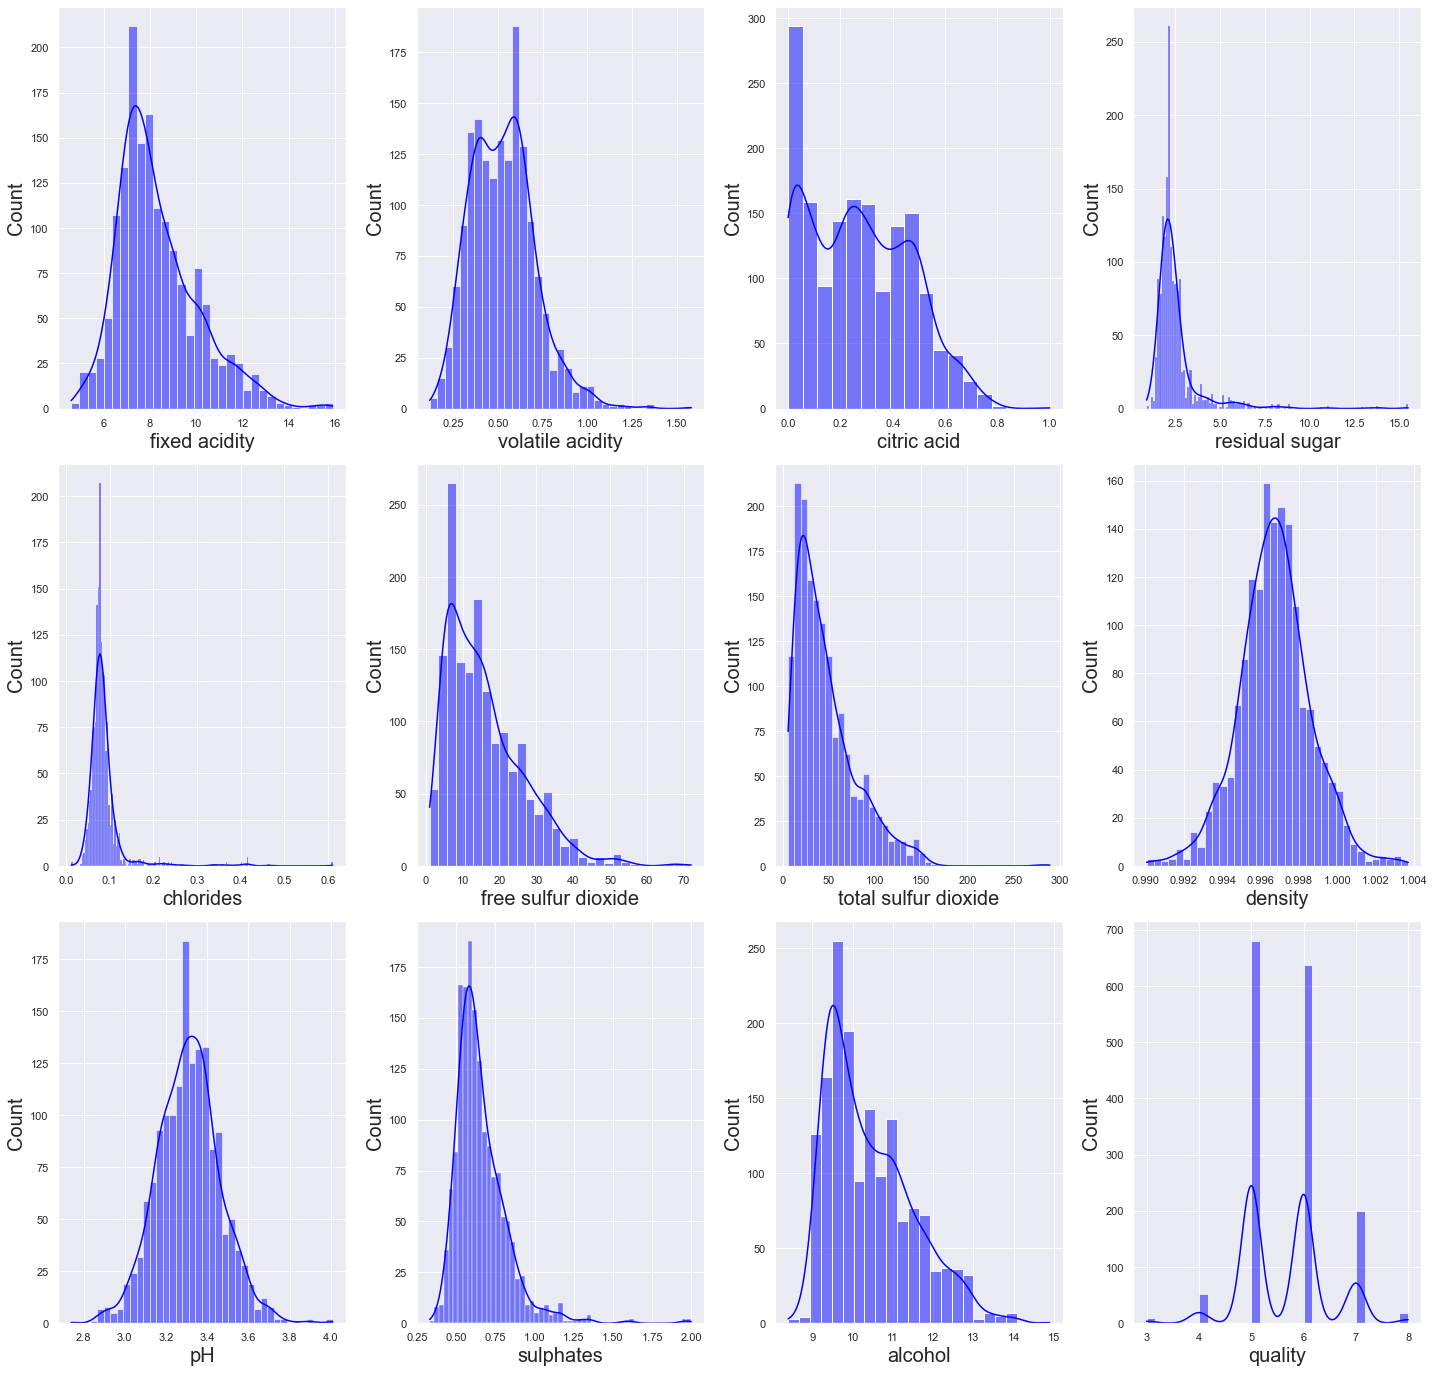

In [10]:
sns.set_theme(style='darkgrid', palette='deep')
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dataset.columns:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x = dataset[column], kde=True, color='blue')
        plt.xlabel(column, fontsize=20)
        plt.ylabel("Count", fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [11]:
def gaussian_data(dataframe, feature):
    ub = dataframe[feature].mean() + 3*dataframe[feature].std()
    lb = dataframe[feature].mean() - 3*dataframe[feature].std()
    print ("\n Feature : {} \n".format( dataframe[feature].name),'-'*60, sep='')
    return print("Upper Boundary : {}" .format(ub)), print("Lower Boundary : {}" .format(lb)), print("Mean Value : {}".format(dataframe[feature].mean()))

In [12]:
## Skewed data

def skewed_data(dataframe, feature):
    IQR = dataframe[feature].quantile(0.75) - dataframe[feature].quantile(0.25)
    ub = dataframe[feature].quantile(0.75)+(IQR*1.5)
    lb = dataframe[feature].quantile(0.25)-(IQR*1.5)
    print ("\n Feature : {} \n".format( dataframe[feature].name),'-'*60, sep='')
    return print("Upper Boundary : {}" .format(ub)), print("Lower Boundary : {}" .format(lb)), print("Mean Value : {}".format(dataframe[feature].mean()))

In [13]:
## extremly skewed data

def extreme_data(dataframe, feature):
    IQR = dataframe[feature].quantile(0.75) - dataframe[feature].quantile(0.25)
    ub = dataframe[feature].quantile(0.75)+(IQR*3)
    lb = dataframe[feature].quantile(0.25)-(IQR*3)
    print ("\n Feature : {} \n".format( dataframe[feature].name),'-'*60, sep='')
    return print("Upper Boundary : {}" .format(ub)), print("Lower Boundary : {}" .format(lb)), print("Mean Value : {}".format(dataframe[feature].mean()))

In [14]:
dataset.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

In [18]:
gaussian_data(dataset,'fixed acidity')
gaussian_data(dataset,'volatile acidity')
gaussian_data(dataset,'density')
gaussian_data(dataset,'pH')


 Feature : fixed acidity 
------------------------------------------------------------
Upper Boundary : 13.542926227678894
Lower Boundary : 3.0963483189127237
Mean Value : 8.31963727329581

 Feature : volatile acidity 
------------------------------------------------------------
Upper Boundary : 1.064999625281119
Lower Boundary : -0.009358599640093335
Mean Value : 0.5278205128205128

 Feature : density 
------------------------------------------------------------
Upper Boundary : 1.0024086810360118
Lower Boundary : 0.9910846773129565
Mean Value : 0.9967466791744841

 Feature : pH 
------------------------------------------------------------
Upper Boundary : 3.77427259045797
Lower Boundary : 2.8479538010367134
Mean Value : 3.3111131957473416


(None, None, None)

In [19]:
## These Four features are follows Gaussian distributions
## we have checked upper and lower boundary for them and found that aprat from density we have to remove remaining outliers.
## in density feature we got an upper boundary with the value of 1.00 and the max value 1.00 also same so there is no need to remove these value.


In [20]:
trans_df = dataset.copy()
trans_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [21]:
trans_df.loc[trans_df['fixed acidity']>=13.5, 'fixed acidity']=13.5
trans_df.loc[trans_df['volatile acidity']>=1, 'volatile acidity']=1
trans_df.loc[trans_df['pH']>=3.7, 'pH']=3.7

In [22]:
skewed_data(dataset,'free sulfur dioxide')
skewed_data(dataset,'total sulfur dioxide')
skewed_data(dataset,'sulphates')
skewed_data(dataset,'alcohol')


 Feature : free sulfur dioxide 
------------------------------------------------------------
Upper Boundary : 42.0
Lower Boundary : -14.0
Mean Value : 15.874921826141339

 Feature : total sulfur dioxide 
------------------------------------------------------------
Upper Boundary : 122.0
Lower Boundary : -38.0
Mean Value : 46.46779237023139

 Feature : sulphates 
------------------------------------------------------------
Upper Boundary : 0.9999999999999999
Lower Boundary : 0.28000000000000014
Mean Value : 0.6581488430268917

 Feature : alcohol 
------------------------------------------------------------
Upper Boundary : 13.5
Lower Boundary : 7.1000000000000005
Mean Value : 10.422983114446529


(None, None, None)

In [23]:
## These features have a skewedness in the distribution and outliers as well.
## So first we will remove these outliers and than transform them.

In [24]:
trans_df.loc[trans_df['free sulfur dioxide']>=42, 'free sulfur dioxide']=42
trans_df.loc[trans_df['total sulfur dioxide']>=122, 'total sulfur dioxide']=122
trans_df.loc[trans_df['sulphates']>=0.99, 'sulphates']=0.99
trans_df.loc[trans_df['alcohol']>=13.5, 'alcohol']=13.5

In [25]:
extreme_data(dataset,'residual sugar')
extreme_data(dataset,'chlorides')


 Feature : residual sugar 
------------------------------------------------------------
Upper Boundary : 4.700000000000001
Lower Boundary : -0.20000000000000062
Mean Value : 2.53880550343965

 Feature : chlorides 
------------------------------------------------------------
Upper Boundary : 0.14999999999999997
Lower Boundary : 0.010000000000000037
Mean Value : 0.08746654158849279


(None, None, None)

In [26]:
## These features have a extreme presence of outliers so we also remove from here.

In [27]:
trans_df.loc[trans_df['residual sugar']>=4.7, 'residual sugar']=4.7
trans_df.loc[trans_df['chlorides']>=0.14, 'chlorides']=0.14

In [28]:
trans_df.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.309881   1.706625  4.60000   7.1000   
volatile acidity      1599.0   0.526241   0.173525  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.400938   0.805355  0.90000   1.9000   
chlorides             1599.0   0.082147   0.020436  0.01200   0.0700   
free sulfur dioxide   1599.0  15.689181   9.837494  1.00000   7.0000   
total sulfur dioxide  1599.0  45.714822  30.374029  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.310163   0.151322  2.74000   3.2100   
sulphates             1599.0   0.649462   0.136153  0.33000   0.5500   
alcohol               1599.0  10.419627   1.054808  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   13.50000  
volatile acidity       0.52000   0.640000    1.00000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000    4.70000  
chlorides              0.07900   0.090000    0.14000  
free sulfur dioxide   14.00000  21.000000   42.00000  
total sulfur dioxide  38.00000  62.000000  122.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    3.70000  
sulphates              0.62000   0.730000    0.99000  
alcohol               10.20000  11.100000   13.50000  
quality                6.00000   6.000000    8.00000

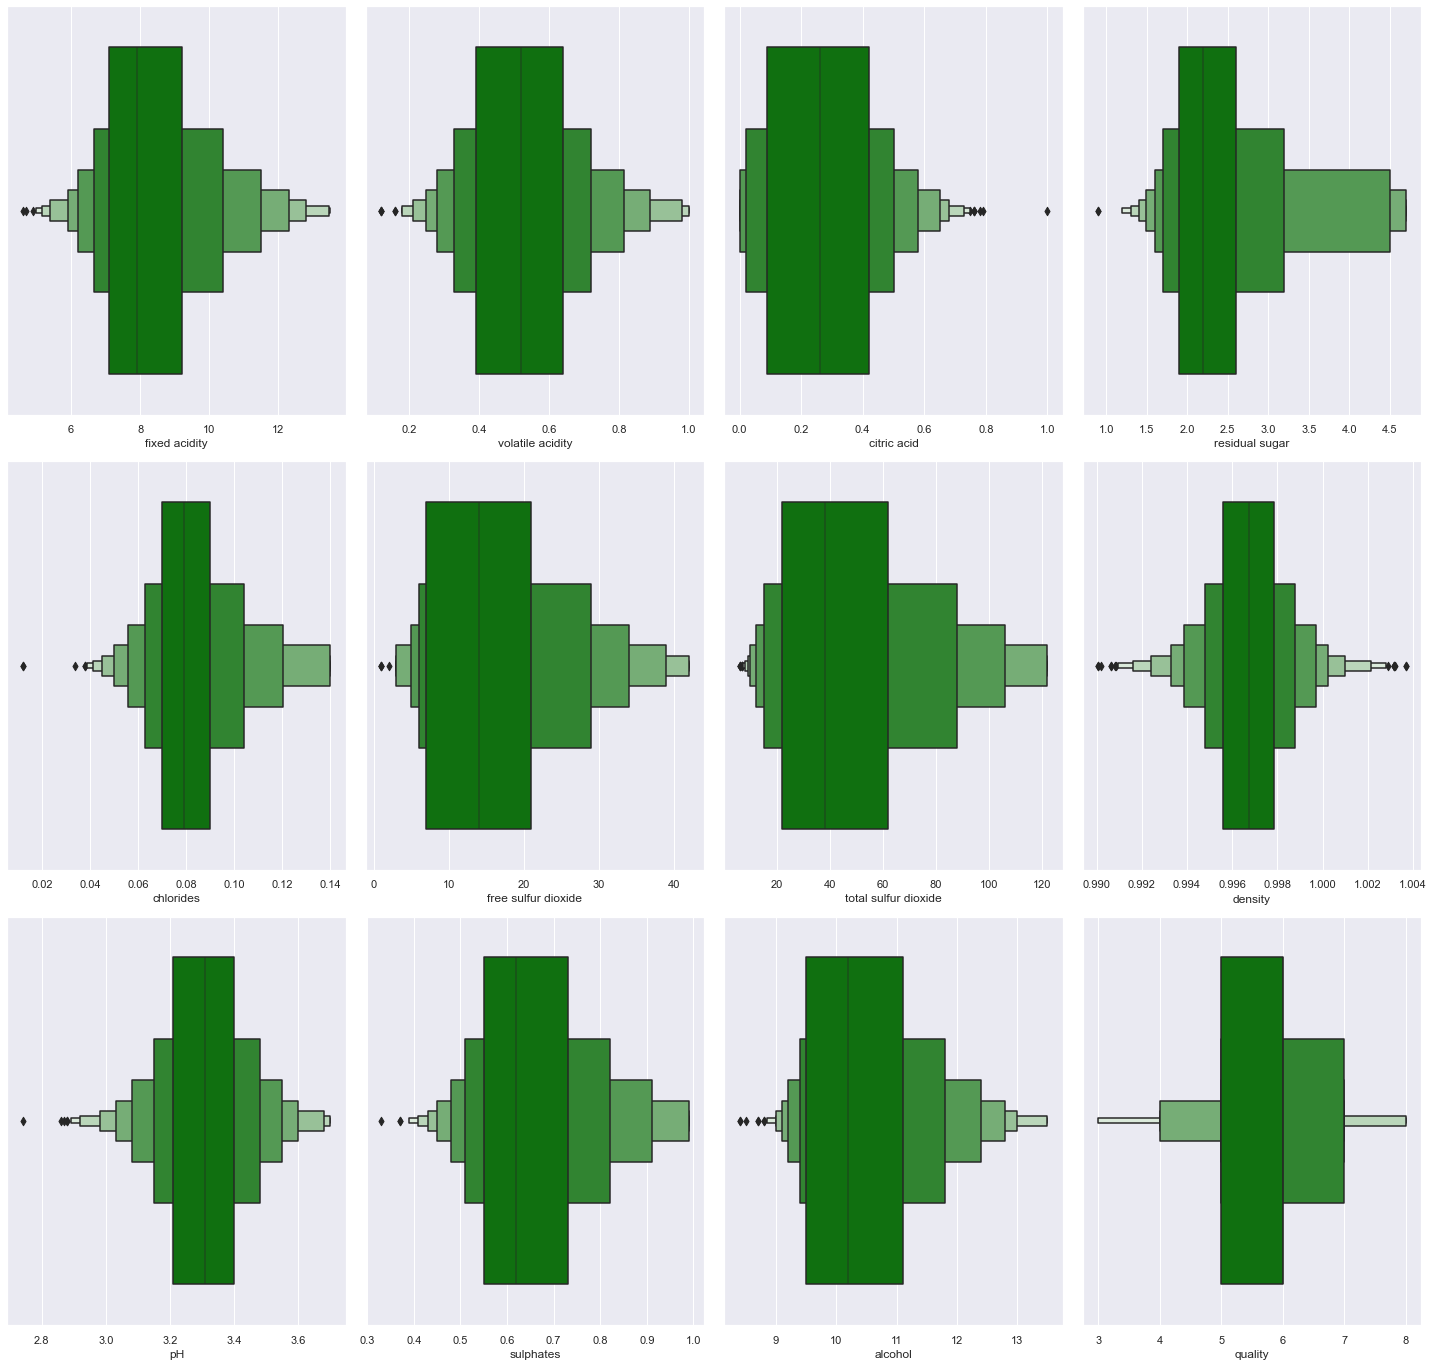

In [29]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for feature in trans_df.columns:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxenplot(x = trans_df[feature],color='green')
    plotnumber+=1
plt.tight_layout()

In [ ]:
sns.set_theme(style='darkgrid', palette='deep')
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in trans_df.columns:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x = trans_df[column], kde=True, color='blue')
        plt.xlabel(column, fontsize=20)
        plt.ylabel("Count", fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [30]:
zeros_feature = trans_df.columns
for col in zeros_feature:
    print(f" Zero in {col} : {(trans_df[col]==0).sum()}")

 Zero in fixed acidity : 0
 Zero in volatile acidity : 0
 Zero in citric acid : 132
 Zero in residual sugar : 0
 Zero in chlorides : 0
 Zero in free sulfur dioxide : 0
 Zero in total sulfur dioxide : 0
 Zero in density : 0
 Zero in pH : 0
 Zero in sulphates : 0
 Zero in alcohol : 0
 Zero in quality : 0


In [ ]:
## In citric acid we have a large amount of zeros, so we will try to impute them with median. and try to find out will it be useful or not.

In [31]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=0, strategy='median')
imputer.fit(trans_df)

trans_df = pd.DataFrame(imputer.transform(trans_df), columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'])

print('\nZeros in each of the feature\n','-'*30, sep='')
for col in trans_df:
    print(f" Zero in {col} : {(trans_df[col]==0).sum()}")


Zeros in each of the feature
------------------------------
 Zero in fixed acidity : 0
 Zero in volatile acidity : 0
 Zero in citric acid : 0
 Zero in residual sugar : 0
 Zero in chlorides : 0
 Zero in free sulfur dioxide : 0
 Zero in total sulfur dioxide : 0
 Zero in density : 0
 Zero in pH : 0
 Zero in sulphates : 0
 Zero in alcohol : 0
 Zero in quality : 0


<AxesSubplot:xlabel='citric acid', ylabel='Count'>

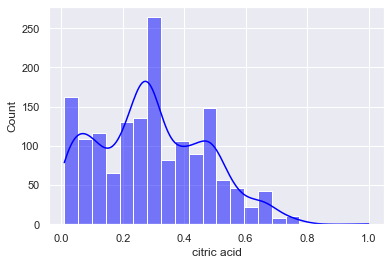

In [32]:
sns.histplot(x = trans_df['citric acid'], kde=True, color='blue')

In [ ]:
sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=2)
graph = sns.pairplot(trans_df, kind='scatter', diag_kind='kde', hue='quality')
graph.fig.set_size_inches(35,35)

In [ ]:
## Check For Multicollinearity:

In [33]:
trans_df.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.309881   1.706625  4.60000   7.1000   
volatile acidity      1599.0   0.526241   0.173525  0.12000   0.3900   
citric acid           1599.0   0.294090   0.177071  0.01000   0.1500   
residual sugar        1599.0   2.400938   0.805355  0.90000   1.9000   
chlorides             1599.0   0.082147   0.020436  0.01200   0.0700   
free sulfur dioxide   1599.0  15.689181   9.837494  1.00000   7.0000   
total sulfur dioxide  1599.0  45.714822  30.374029  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.310163   0.151322  2.74000   3.2100   
sulphates             1599.0   0.649462   0.136153  0.33000   0.5500   
alcohol               1599.0  10.419627   1.054808  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   13.50000  
volatile acidity       0.52000   0.640000    1.00000  
citric acid            0.28000   0.420000    1.00000  
residual sugar         2.20000   2.600000    4.70000  
chlorides              0.07900   0.090000    0.14000  
free sulfur dioxide   14.00000  21.000000   42.00000  
total sulfur dioxide  38.00000  62.000000  122.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    3.70000  
sulphates              0.62000   0.730000    0.99000  
alcohol               10.20000  11.100000   13.50000  
quality                6.00000   6.000000    8.00000

In [34]:
trans_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.28             1.9      0.076   
1            7.8              0.88         0.28             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.28             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0  
3      9.8      6.0  
4      9.4      5.0

In [35]:
y = trans_df['quality']
X = trans_df.drop(columns=['quality'])
X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.28             1.9      0.076   
1               7.8             0.880         0.28             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.28             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns

In [39]:
vif

VIF              Features
0   7.292386         fixed acidity
1   1.586996      volatile acidity
2   2.340631           citric acid
3   1.889790        residual sugar
4   1.348958             chlorides
5   2.017474   free sulfur dioxide
6   2.224424  total sulfur dioxide
7   7.033660               density
8   3.134213                    pH
9   1.325905             sulphates
10  3.319342               alcohol

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

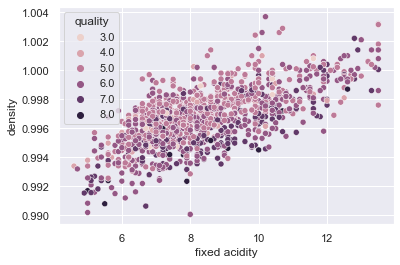

In [43]:
trans_df[['fixed acidity','density']]
sns.scatterplot(data=trans_df, x='fixed acidity', y='density', hue='quality')

In [41]:
trans_df['fixed acidity'].corr(trans_df['density'])

0.667444348257416

In [44]:
trans_df['fixed acidity'] = trans_df['fixed acidity'] - trans_df['density']

In [48]:
X = trans_df.drop(columns=['density','quality'])
X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           6.40220             0.700         0.28             1.9      0.076   
1           6.80320             0.880         0.28             2.6      0.098   
2           6.80300             0.760         0.04             2.3      0.092   
3          10.20200             0.280         0.56             1.9      0.075   
4           6.40220             0.700         0.28             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594        5.20510             0.600         0.08             2.0      0.090   
1595        4.90488             0.550         0.10             2.2      0.062   
1596        5.30426             0.510         0.13             2.3      0.076   
1597        4.90453             0.645         0.12             2.0      0.075   
1598        5.00451             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide    pH  sulphates  alcohol  
0                    11.0                  34.0  3.51       0.56      9.4  
1                    25.0                  67.0  3.20       0.68      9.8  
2                    15.0                  54.0  3.26       0.65      9.8  
3                    17.0                  60.0  3.16       0.58      9.8  
4                    11.0                  34.0  3.51       0.56      9.4  
...                   ...                   ...   ...        ...      ...  
1594                 32.0                  44.0  3.45       0.58     10.5  
1595                 39.0                  51.0  3.52       0.76     11.2  
1596                 29.0                  40.0  3.42       0.75     11.0  
1597                 32.0                  44.0  3.57       0.71     10.2  
1598                 18.0                  42.0  3.39       0.66     11.0  

[1599 rows x 10 columns]

In [49]:
dataset['fixed acidity'].max()

15.9

In [50]:
X['fixed acidity'].max()

12.5024

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns

In [53]:
vif

VIF              Features
0  2.746082         fixed acidity
1  1.569957      volatile acidity
2  2.340618           citric acid
3  1.157459        residual sugar
4  1.297895             chlorides
5  2.006292   free sulfur dioxide
6  2.208566  total sulfur dioxide
7  2.128168                    pH
8  1.230250             sulphates
9  1.372066               alcohol

In [ ]:
import scipy.stats as stats 

for column in trans_df.columns:
    print(column)
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    trans_df[column].hist()
    plt.subplot(1,2,2)
    stats.probplot(trans_df[column], dist='norm', plot=plt)
    plt.show()

In [57]:
trans_df = trans_df.drop(columns=['density'], axis=1)

In [138]:
trans_df.to_csv("Preprocessed_WQuality.csv")